### Make samples for annotation and save in CSV file

1. Set variables

In [2]:
annotators = ["Luuk", "Shantanu", "Eline"]
sample_size = 100
random_state = 23

2. Read in data

In [3]:
import pandas as pd
df = pd.read_csv("../The_Office_lines.csv")

3. Visualize distributions of season and character

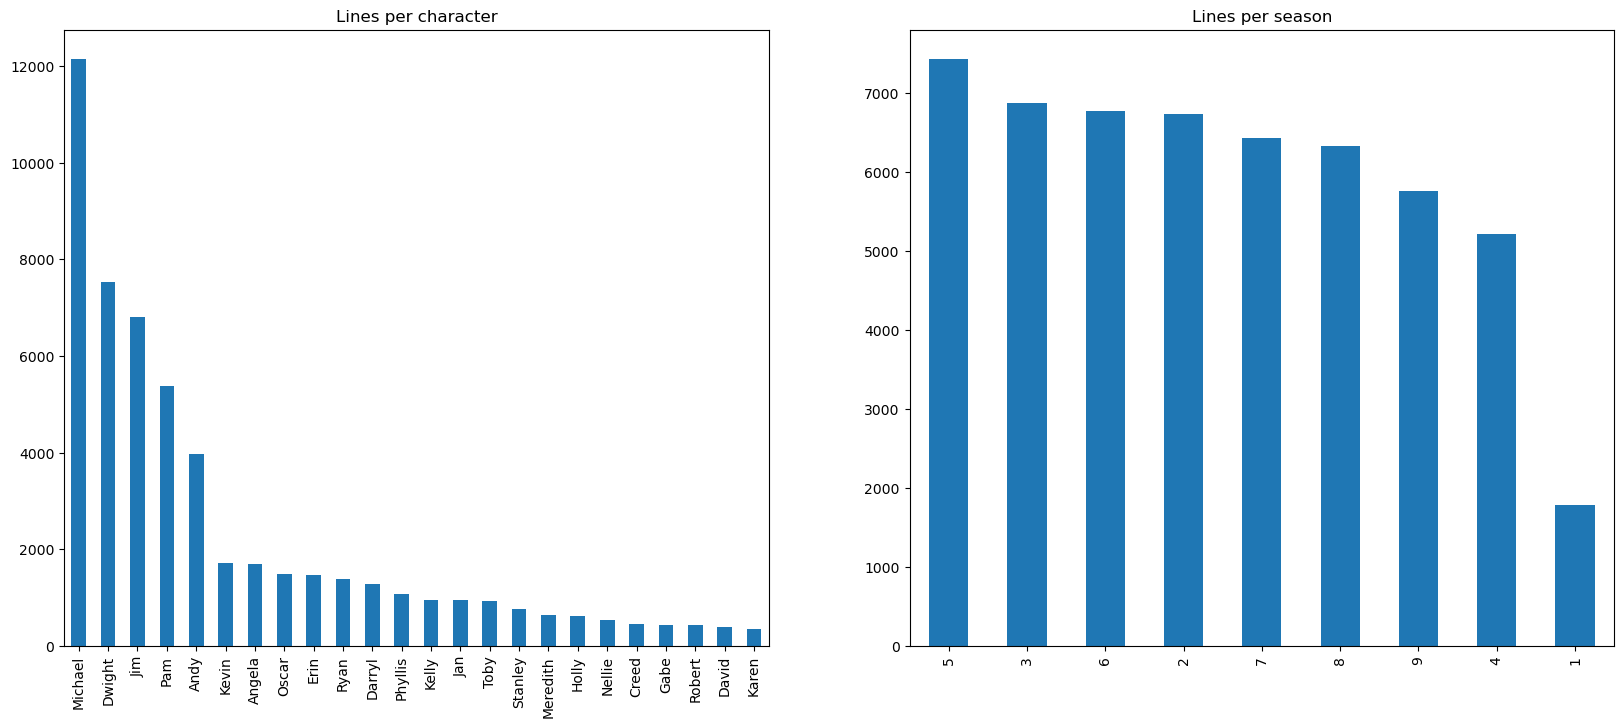

In [4]:
import matplotlib.pyplot as plt

def plot_distributions(df, n_min=300):
    # visualize the distribution of the number of lines per character
    df_filter = df[df["speaker"].isin(df["speaker"].value_counts()[df["speaker"].value_counts() > n_min].index)]

    # plot two plots next to each other
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    ax1.set_title("Lines per character")
    ax2.set_title("Lines per season")

    # filter out the characters with less than 300 lines
    df_filter["speaker"].value_counts().plot(kind="bar", ax=ax1)

    # visualize the distribution of the number of lines per season, ordering by season
    df_filter["season"].value_counts().plot(kind="bar", ax=ax2)

plot_distributions(df)

4. Take random sample

In [5]:
samples = df.sample(sample_size*len(annotators), random_state=random_state)

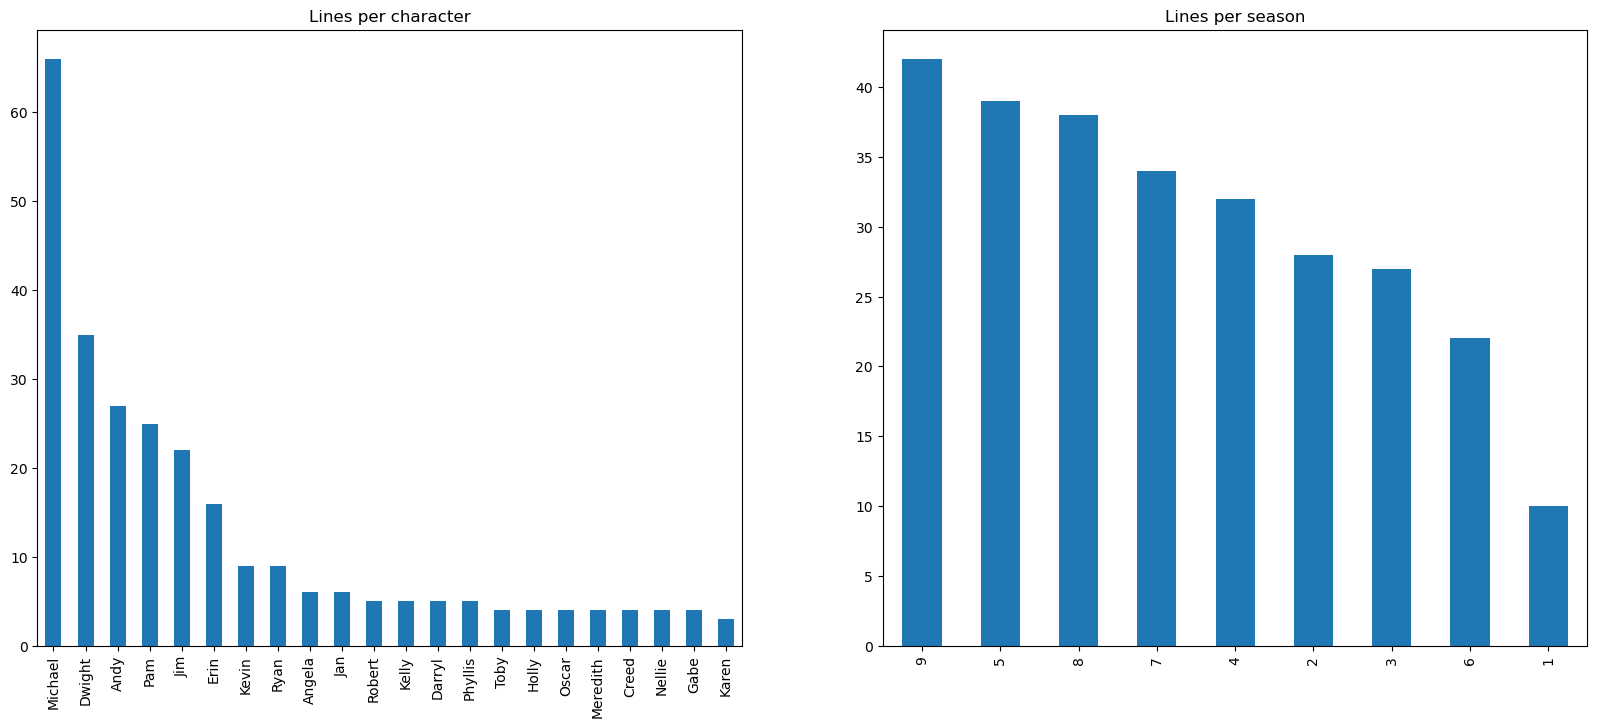

In [6]:
# check if distribution in samples is similar to original
plot_distributions(samples, n_min=2)

As we can see the distributions are very similar, meaning our samples are representative of the whole dataset.

5. Split into samples and save to csv

In [10]:
# filter out irrelevant columns
samples_filtered = samples[["id", "speaker", "line_text"]]
samples_filtered["Sentiment"] = pd.Series(dtype='int')

# split the samples into the different annotators
new_samples = []
for i in range(len(annotators)):
    new_samples.append(samples_filtered[i*sample_size:(i+1)*sample_size])

# !Be careful with this, it will overwrite the existing files if they are already annotated!
overwrite = False

# save samples to csv
if overwrite:
    for i in range(len(annotators)):
        new_samples[i].to_csv(f"sample_{annotators[i]}.csv", index=False)

/home/luuk/anaconda3/envs/textmining/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# compute number of non-NaN items in Sentiment column
len(new_samples[1])

100